In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
from zipfile import ZipFile
import time
from datetime import datetime
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D
from tensorflow.keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras import utils
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

import pickle
from keras.utils import np_utils
from sklearn.utils import shuffle

# Setting random seeds to reduce the amount of randomness in the neural net weights and results
# The results may still not be exactly reproducible

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def plot_history(history_fine):
  f1 = history_fine.history['accuracy']
  val_f1 = history_fine.history['val_accuracy']
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
# Load Data 
import pickle
from google.colab import drive

In [ ]:
with open('/content/drive/MyDrive/Project_final_AI/train_age_4.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

In [ ]:
# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
final_cnn = Sequential()


final_cnn.add(Conv2D(filters=60, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))    # 3rd dim = 1 for grayscale images.
final_cnn.add(MaxPooling2D(pool_size=(2,2)))

final_cnn.add(Conv2D(filters=50, kernel_size=3, activation='relu'))
final_cnn.add(MaxPooling2D(pool_size=(2,2)))
final_cnn.add(Dropout(0.2))

final_cnn.add(Conv2D(filters=50, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
final_cnn.add(MaxPooling2D(pool_size=(2,2)))
final_cnn.add(Dropout(0.2))

final_cnn.add(Conv2D(filters=40, kernel_size=3, activation='relu'))
final_cnn.add(MaxPooling2D(pool_size=(2,2)))

final_cnn.add(Conv2D(filters=30, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))
final_cnn.add(Dropout(0.2))

final_cnn.add(GlobalAveragePooling2D())

# final_cnn.Flatten()
final_cnn.add(Dense(8, activation='softmax'))
final_cnn.add(Dropout(0.2))
# final_cnn.add(Dense(8, activation='softmax'))

final_cnn.summary()

final_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = final_cnn.fit(x_train, y_train, epochs = 70, batch_size = 128, validation_split = 0.2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 60)      1680      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 60)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 50)        27050     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 50)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 36, 36, 50)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 50)       

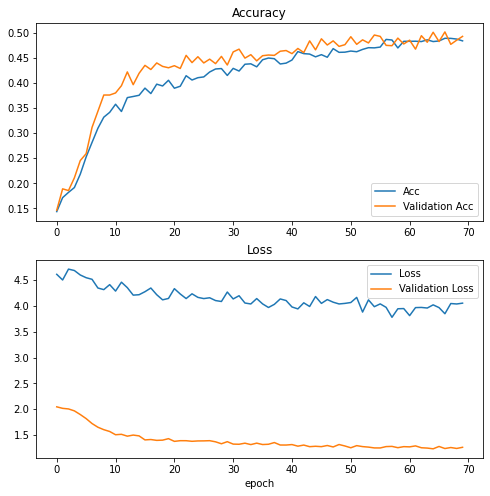

In [ ]:
plot_history(history)

In [ ]:
final_cnn.save("model_shape_face_1.h5")